# Neural Network Project

## Dataset

The dataset I have used is taken and modified from the [MNIST digit dataset](http://yann.lecun.com/exdb/mnist/). The dataset consists of 5000 handwritten digit images and the corresponding labels (i.e., correct answers). Each image is 20 pixel by 20 pixel. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The figure below showed some examples from the dataset:

## Neural Network

Here is a basic unit/node of a neural network:

<center><img src="img/neuron.png"/></center>

It takes weighted inputs. In this example, $z = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$ (assume $w_1$, $w_2$, and $w_3$ are the weights correspondingly, $b$ is the bias which didn’t show in the figure above). The output is $a = g(z)$ where $g$ is a non-linear activation function. In this assignment, we use the sigmoid function $\sigma(z)$ which is defined as:

<center>$\sigma(z)=\frac{1}{1+e^{-z}}$</center>

A sigmoid function looks like this:

<center><img src="img/sigmoid.png"/></center>

A neural network is composed of these units. There are many such units in each layer, and there are many layers. In this project, we will firstly use a 2-layers neural net. The layers are an input layer, a hidden layer and an output layer. Our inputs are simply pixel values of digit images. The size of each image is 20 by 20.

The training data will be loaded into the variables `train_x` and `train_y` by the function `load_data(training_percentage)`. I will set the `training_percentage` to 1. You can ignore the `test_x` and `test_y` generated by the load_data function for now. 
The `train_x` contains 5000 vectorized samples, and the `train_y` stores the corresponding labels like 6, 1, 2, etc. 

You can play around with different values for `training_percentage` to see the result. This parameter indicates the percentage of data used for training data, and the reset will be used as testing data. So the range is between 0 and 1. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

from util import load_data, display_digit_image, reshape_Y, display_cost, compute_accuracy

 
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(3)

training_percentage = 1

train_x, train_y, test_x, test_y = load_data(training_percentage)

To visualize a sample from the training examples, please run the following code. Feel free to change `index` to see another training example (e.g., 2) (Note: this number is not the label, just the index of the training example).

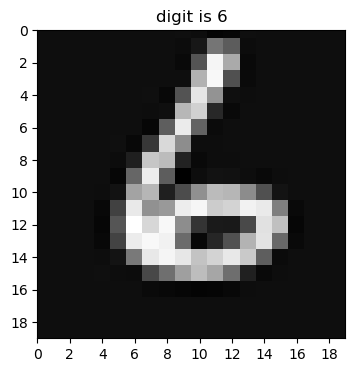

In [ ]:
display_digit_image(train_x, train_y, index = 1)

For the hidden layer, we will first include 25 units, and we will play around it later. For the output layer, we will set it to have 10 units. Here is a visualization of the neural network: 

<center><img src="img/neural_network.png"/></center>

The value provided to the input layer will be weighted and passed to the hidden layer. The value at the hidden layer will then go through the activation function and the result will be passed to the output layer. The value will also go through the activation function. At the output layer, the node of the largest value will win and the label represented by the node will be the image’s label. This process is called **feedforward**, and process can be used to **predict** the label given new examples.

We will initialize the weights randomly. the output will be very different from the true label. The cost function is used to evaluate how different it is between the true label and the predicted label. The network will then propagate this information back by calculating the derivatives. The weights of the network will update themselves accordingly. This process is called **backpropagation**. 

## Feedforward

The input data and output can be obtained with (feel free to add code to check the shape of these values):

In [ ]:
X = train_x
y = train_y
Y = reshape_Y(y)

The shape is in the form of row by column. For example, for the following matrix:

<center>$\begin{bmatrix}1 & 2 & 3\\4 & 5 & 6\end{bmatrix}$</center>

It can be defined in numpy as:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

It is a 2 by 3 matrix, and the shape can be obtained with `a.shape`. The result can be printed with:

In [ ]:
print(a.shape)

Before implementing the feedforward process, we need to think about the dimension of the parameters and values. Correct dimensions can help us a lot when debugging the code. Recall that the neural network we will implement is with 3 layers, there are 400 units in the input layer, 25 in the hidden layer, and 10 at the output layer.
So whenever this program is used from my github it is very important to know the dimensions.

Please fill free to print out the shape of `X`, `y`, and `Y`. The index represents which layer the value belongs to. For example, `Z2` is the linear combination of the values from the values of the previous layer, and `A2` is the value after activation . 

Here we can see that the dimension of `Y` and `y` is different. This is because the raw data provided 1, 2, 3, 4 as labels, and the output of the neural net uses one-hot encoding and it is a vector of length 10, with index 0 corresponds to the probability of digit 0, index 1 corresponds to the probability of digit 1, etc. 

In [ ]:
# shape of X (input, which is train_x)
print(X.shape)

(400, 5000)


In [ ]:
#shape of y(true label, which is train_y)
print(y.shape)

(1, 5000)


In [ ]:
#shape of Y(true label, which is reshaped train_Y)
print(Y.shape)

(10, 5000)


In [ ]:
# shape of A0 is same as X  because there is no activation funtion 
print(X.shape)


(400, 5000)


In [ ]:
#Z1 = (25, 5000)
#A1 = (25,5000) element wise function
#Z2 = (10,5000)
#A2 = (10, 5000)

Note : A0 and X have the same dimensions but this is not a coincidence because in most of the neural networks A0 represents
activation of input layer which is the input data itself. Therefore, A0 and X typically have the same dimensions because A0 is derived from X.

Please take a look at the implementation. Let's initialize the neural network with the following hyperparameter:

In [ ]:
layers_dims = [400, 25, 10]

It represents a two-layer neural network. The first layer (i.e., the input layer) has 400 units, the second layer (i.e., the hidden layer) has 25 units, and the third layer (i.e., the output layer) has 10 units. The `initialize_parameters` function initilize the parameters of the neural network.

In [ ]:
def initialize_parameters(layer_dims):
    """
    Please read the following prompt.
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

It returns a dictionary of parameters, with the keywords `W1`, `b1`, `W2` and `b2`. The `W*` represents the weights, and the `b*` is the bias.

Given the input `A_prev` from the previous layer, and the parameters `W` and `b`, the values at the current layer is calculated as follows:

$$Z = WA_{prev} + b$$
$$A = sigmoid(Z)$$

Please complete the sigmoid function (please put your code in between the start code and end code here, and delete the `pass`)

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    """
   
    A = 1/(1+np.exp(-Z))
      
    
    return A

You can check the correctness of your implementation by visualizing the function with the code below

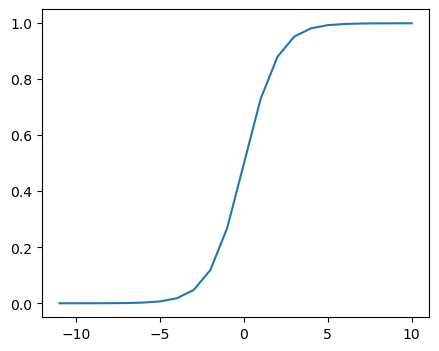

In [ ]:
sigmoid_x = np.arange(-11., 11.)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)
plt.show()

We can use the `sigmoid` function that we implemented before.*

In [ ]:
def linear_activation_forward(A_prev, W, b):
    """
    Implements the forward propagation for one layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the result of linear calculation
    A -- the output of the activation function, also called the post-activation value 
    """

 
    Z = np.dot(W, A_prev) + b
    A = sigmoid(Z)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    assert(A.shape == (W.shape[0], A_prev.shape[1]))

    return Z, A

Here is the `feedforward` function and the `predict` function that is implemented .

In [ ]:
def feedforward(X, parameters):
    """
    Implements forward propagation. The activation functions are all sigmoid functions.
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters(layer_dims)
    
    Returns:
    AL -- last post-activation value
    caches -- a python dictionary containing "a1", "z2", "a2", "z3", ...; they are stored for computing the backward pass efficiently
    """

    caches = {}
    caches["A0"] = X
    A = X
    L = len(parameters) // 2                  # number of layers (excluding input layer, including output layer) in the neural network
    
    for l in range(1, L + 1):
        A_prev = A 
        Z, A = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        caches["Z" + str(l)] = Z
        caches["A" + str(l)] = A
    
    assert(A.shape == (10, X.shape[1]))
            
    return A, caches

In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (0, 1, 2, 3 ...)
    """
    A2, cache = feedforward(X, parameters)
    predictions = np.argmax(A2, axis = 0)
    np.reshape(predictions, (1, np.shape(predictions)[0]))
    
    return predictions

The values are cached so that the calculations in the backpropogation process can be more efficient.

Once we implement the above code correctly, this following chunk of code should output `[0.49058414 0.49043377 0.49029028 ... 0.49059123 0.49059543 0.49074616]`.

In [ ]:
print(feedforward(train_x, initialize_parameters(layers_dims))[1]["A2"][0])

[0.49058414 0.49043377 0.49029028 ... 0.49059123 0.49059543 0.49074616]


## Backpropagation

The cost function is calculated as follows (this might look a little bit different to the generic vectorization form of logistic regression . This is because the output in logistic regression is a vector as we only expect 1 predicted value in each example, but it is a matrix in neural network).


<center>$$J(W, b)=\sum_{n=1}^{m} \frac{1}{m}[-Y \circ \log(AL)-(1-Y) \circ \log(1-AL)]$$</center>

where `AL` is the value of the output layer (in our neural network, it is `A2`), $\circ$ is element-wise multiplication

We need to implement the cost fucntion here.

In [ ]:
def compute_cost(AL, Y):
    """
    Implements the cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (10, number of examples)
    Y -- true "label" vector after reshape by reshape_Y function, shape (10, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute cost.
 
    

    log_probs = Y * np.log(AL) + (1 - Y) * np.log(1 - AL)
    cost = -np.sum(log_probs) / m
     

    cost = np.squeeze(cost)     # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

Here is how we update the weights. The main idea is to calculate the “differences” (which is actually derivative.We perceive it as a way to evaluate as difference, but it is not just a simple subtraction in quantity) of the current value to the target value (which is denoted as `dZ*`, where * is the layer index), and thus once we figure out the differences (denoted as `dW*` and `db*`)  between the current weights and the ideal value of weights, and we update the weights accordingly. And we will work backwards, which is from the output layer to the input layer.

The weight and bias at each layer are updated with:

<center>$$W_i=W_i-\alpha \frac{\partial J}{\partial W_i}$$</center>
<center>$$b_i=b_i-\alpha \frac{\partial J}{\partial b_i}$$</center>

where $i$ is the layer index, and $\alpha$ is the learning rate. Here I these formulas to calculate the partial derivative.

<center>$$\frac{\partial J}{\partial W_i} =\frac{1}{m} \frac{\partial J}{\partial Z_{i}} A_{i-1}^T$$</center>
<center>$$\frac{\partial J}{\partial b_i} =\frac{1}{m} \frac{\partial J}{\partial Z_{i}} \vec{1}$$</center>

The partial derivative with respect to $b_i$ simply get the mean of each row of $\frac{\partial J}{\partial Z_{i}}$, and there could be more than one way to achieve it.

In the partial derivative formulas, you may observe that the key is to find:

<center>$$\frac{\partial J}{\partial Z_i}$$</center>

At the output layer, the $\frac{\partial{J}}{\partial{Z_2}}$ is calculated as:

<center>$$\frac{\partial{J}}{\partial{Z_2}}=A_2-Y$$</center>

At the hidden layer, $\frac{\partial{J}}{\partial{Z_1}}$ are calculated as follows

<center>$$\frac{\partial{J}}{\partial{Z_1}}=(W_2^T\frac{\partial{J}}{\partial{Z_2}}) \circ \frac{\partial{sigmoid(Z_1)}}{\partial{Z_1}}$$</center>

where $\circ$ represents element-wise multiplication.

Now let's implement backpropagation. Note that in the program, we represent $\frac{\partial{J}}{\partial{Z_i}}$ as `dZi`, $\frac{\partial{J}}{\partial{W_i}}$ as `dWi`. First, let's implement the gradient of a sigmoid function. Note that $\frac{\partial{sigmoid(Z_i)}}{\partial{Z_i}}=sigmoid(Z_i) \circ (1-sigmoid(Z_i))$

In [ ]:
def sigmoid_gradient(Z):
    """
    Implements the inverse of the sigmoid
    
    Arguments:
    Z -- numpy array
    
    Returns:
     -- output of inverse of sigmoid(Z), same shape as Z
    """    
   
    sig_z = sigmoid(Z)
    dZ = sig_z * (1 - sig_z)
    return dZ
   
    


In [ ]:
def backpropagation(AL, Y, parameters, caches, layers_dims):
    """
    Implements the backward propagation. This is the function that calculates the partial derivatives dWi. This function also caches dZi in the dictionary grad.
    
    Arguments:
    AL -- probability vector, output of the forward propagation
    Y -- true "label" vector after reshaping by reshape_Y
    caches -- output of the feedforward function
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dZ" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(layers_dims)
    m = AL.shape[1]

    # Initializing the backpropagation, by calculating the dZi of the last layer and save it to grads with the key "dZ*" where * is the index of the layer   
    dAL = -(Y / AL - (1 - Y) / (1 - AL))
    dZL = AL - Y
    grads["dZ" + str(L)] = dZL
    grads["dW" + str(L)] = (1 / m) * np.dot(dZL, caches["A" + str(L - 1)].T)
    grads["db" + str(L)] = (1 / m) * np.dot(dZL, np.ones((m,1)))
    
    for l in reversed(range(1, L)):
        Z = caches["Z" + str(l)]
       
            
        if(l!=(L-1)):
            W = parameters["W"+str(l+1)]
            W_tranpose = W.T
            dZ_prev = grads["dZ"+str(l+1)]
            sigmoid_Grad = sigmoid_gradient(Z)
            dZ = np.dot(W_tranpose,dZ_prev) * sigmoid_Grad
        else:
            A = caches["A"+str(l)]
            dZ = A - Y
        
        grads["dZ" + str(l)] = dZ
        A_prev = caches["A" + str(l-1)]
        A_prev_transpose = A_prev.T
        
        dW = (1/m)* (np.dot(dZ,A_prev_transpose))
        grads["dW"+str(l)] = dW
        
        vector_one = np.ones((m,1))
        db = (1/m)*(np.dot(dZ,vector_one))
        grads["db"+str(l)] = db
    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updatea parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of backpropagation
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
                  
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Updates rule for each parameter. Using a for loop.
   
    for l in range(1, L + 1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    

    
    return parameters

## Put it together

Implement the required lines below and put together the functions you have implemented above.

In [ ]:
def deep_NN(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->SIGMOID]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector, of shape (10, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints all the cost
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []                         # keep track of the cost
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        ### STARTS CODE HERE ###
        AL, caches = feedforward(X, parameters)
        ### ENDS CODE HERE ###
        
        # Compute cost.
        ### STARTS CODE HERE ###
        cost = compute_cost(AL, Y)
        ### ENDS CODE HERE ###
    
        # Backward propagation.
        ### STARTS CODE HERE ###
        
        gradient = backpropagation(AL, Y, parameters, caches, layers_dims)
        ### ENDS CODE HERE ###
 
        # Update parameters.
        ### STARTS CODE HERE ###
        parameters = update_parameters(parameters,gradient,learning_rate)
        ### ENDS CODE HERE ###
        
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        costs.append(cost)
    
    return parameters, costs

Now let's train the neural network by the the code below. NOTE: the training do need some time. If you what know which iteration it is as, you can set `print_cost=True`, but please do not modify the code otherwise.

Optional: you can try different values of `training_percentage`, `learning_rate`, `num_iterations`, or even using a neural network with a different structure by modifying `layers_dims` after we complete this LLM and see whether we will get a more accurate modell, or less accurate model. You are very welcome to share your finding on the discussion to this repository. But when you submit your repository, please submit it with the default values:
```
training_percentage = 1
layers_dims = [400, 25, 10]
learning_rate = 0.5
num_iterations = 2000
```

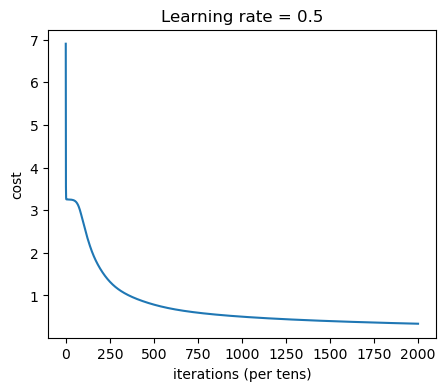

the accuracy on the training set is: 0.957


In [366]:
# hyperparameters
training_percentage = 1
layers_dims = [400, 25, 10]
learning_rate = 0.5
num_iterations = 2000

# loads data and trains it.
train_x, train_y, test_x, test_y = load_data(training_percentage) # load again just in case it got modified while you play around with the code
parameters, costs = deep_NN(train_x, reshape_Y(train_y), layers_dims, learning_rate, num_iterations, print_cost=False)

# shows results
display_cost(costs, learning_rate, figure_index=2)
train_set_predictions = predict(parameters, train_x)
train_set_accuracy = compute_accuracy(train_set_predictions, train_y)
print("the accuracy on the training set is:", train_set_accuracy)